# Chronic Disease Risk Prediction

## Install dependencies

In [1]:
pip install pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Load the Dataset

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv("C:\\Users\\shree\\Desktop\\New folder\\project\\data\\heart_disease_uci.csv")

# Display the first 5 rows
print(data.head())

# Get a summary of numerical columns
print(data.describe())

# Get information about data types and missing values
print(data.info())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
        

## Check for Missing Values

In [3]:
# Check for missing values
print(data.isnull().sum())


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


## Perform Basic Exploratory Data Analysis (EDA)

In [4]:
# Get unique values for categorical columns
for column in data.select_dtypes(include='object').columns:
    print(f"{column}: {data[column].unique()}")


sex: ['Male' 'Female']
dataset: ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
cp: ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
fbs: [True False nan]
restecg: ['lv hypertrophy' 'normal' 'st-t abnormality' nan]
exang: [False True nan]
slope: ['downsloping' 'flat' 'upsloping' nan]
thal: ['fixed defect' 'normal' 'reversable defect' nan]


## Visualize Feature Distributions

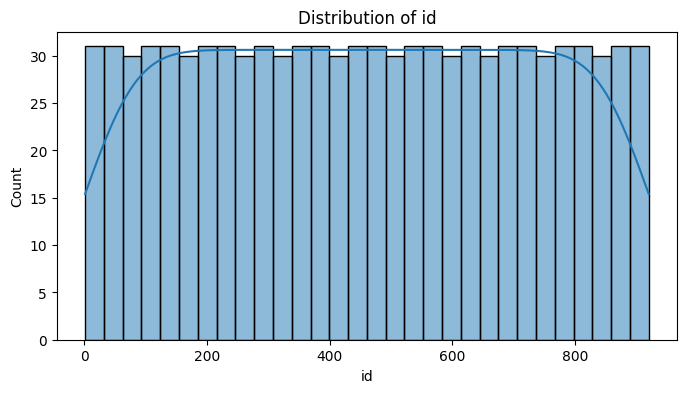

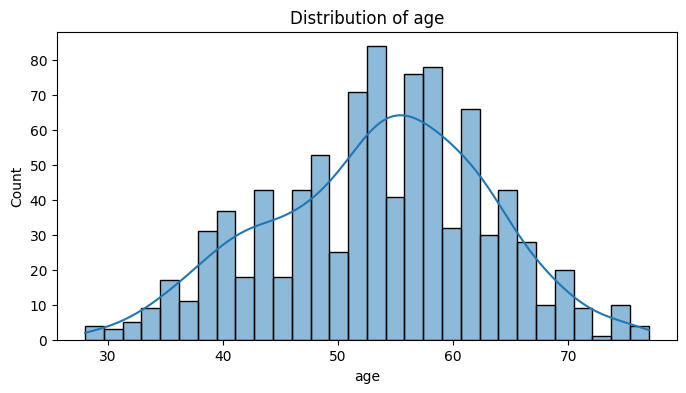

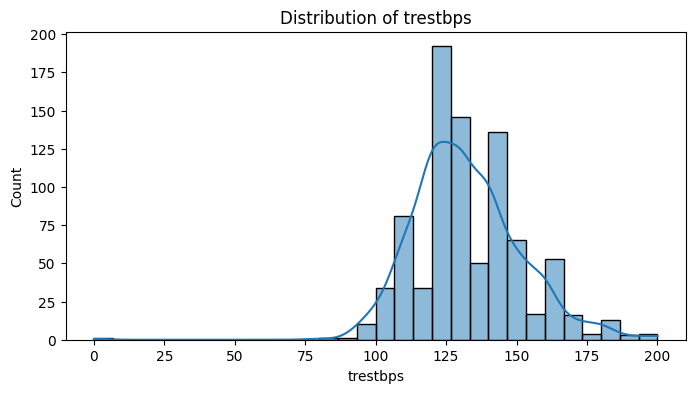

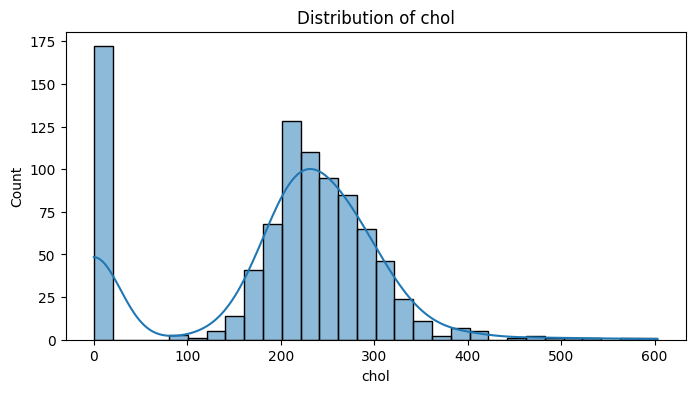

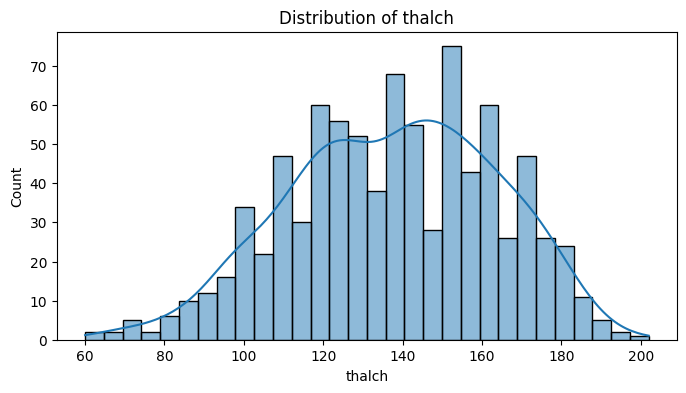

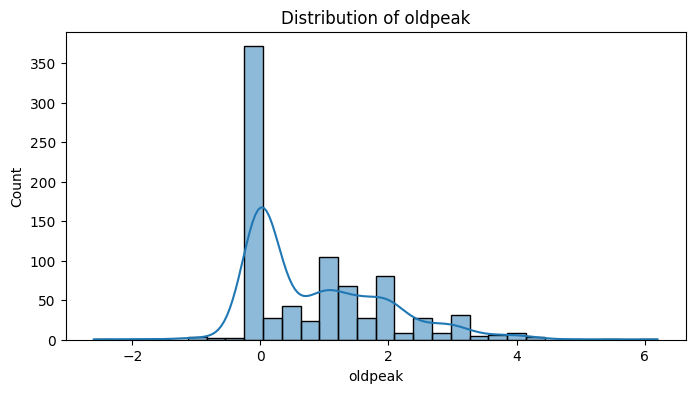

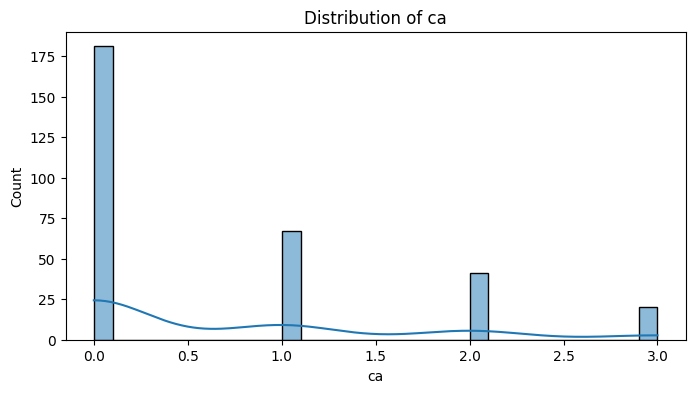

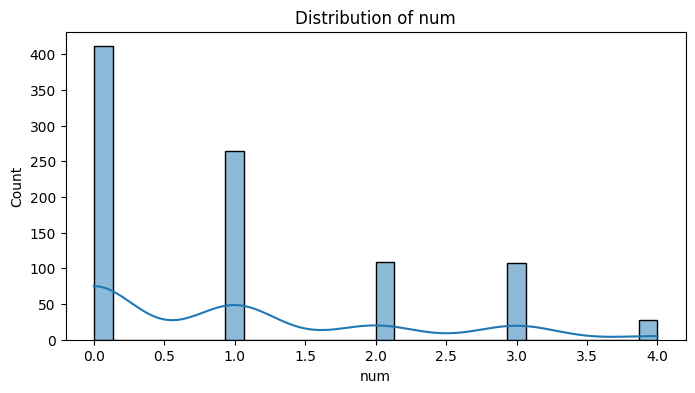

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()


## Check Feature Correlations

Missing values after handling:
 age                         0
sex                         0
trestbps                    0
chol                        0
fbs                         0
thalch                      0
exang                       0
oldpeak                     0
slope                       0
ca                          0
num                         0
dataset_Hungary             0
dataset_Switzerland         0
dataset_VA Long Beach       0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_normal              0
restecg_st-t abnormality    0
thal_normal                 0
thal_reversable defect      0
dtype: int64
Correlation Matrix:
                                age  sex  trestbps      chol       fbs  \
age                       1.000000  NaN  0.229023 -0.091276  0.239221   
sex                            NaN  NaN       NaN       NaN       NaN   
trestbps                  0.229023  NaN  1.000000  0.099541  0.149134   
chol        

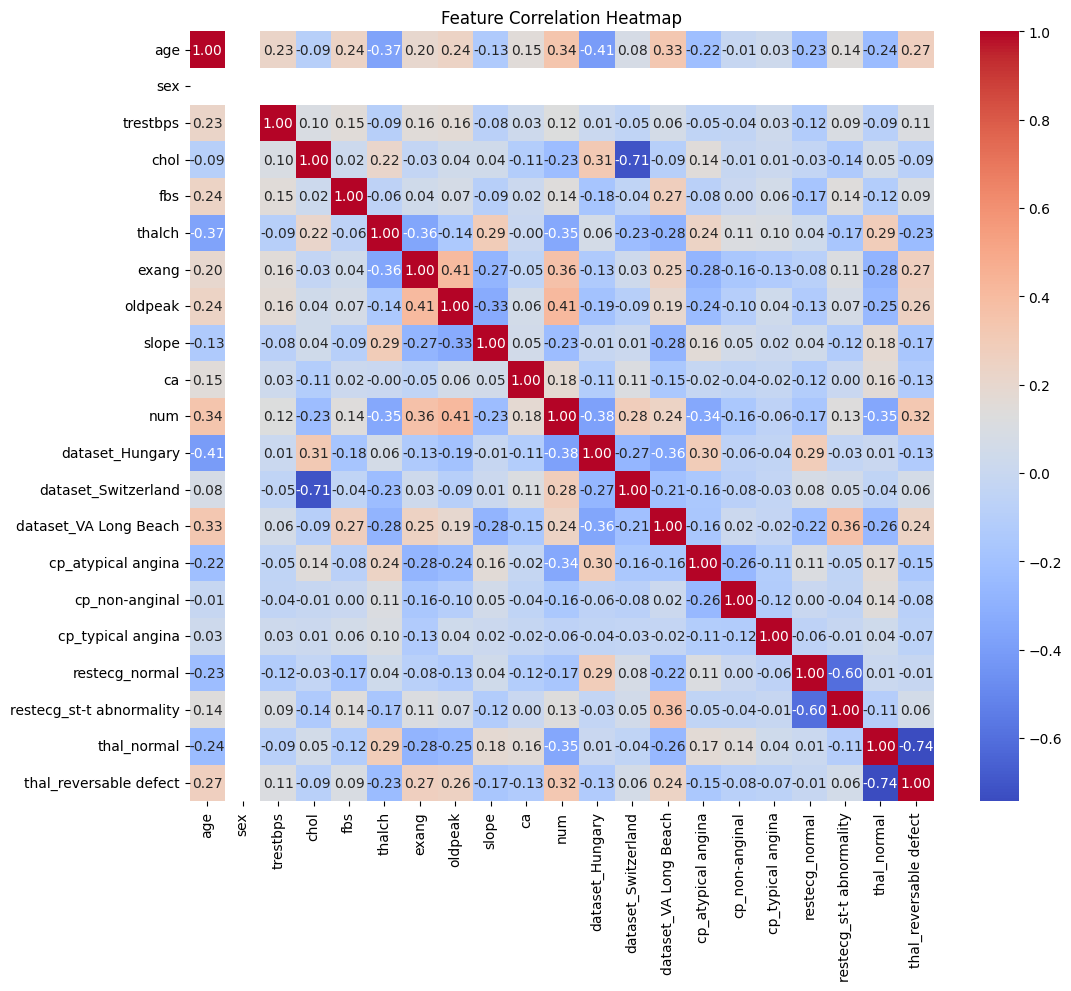

In [10]:
# Handling missing values using forward fill
data = data.ffill()

# Check for remaining missing values
print("Missing values after handling:\n", data.isnull().sum())

# Convert categorical columns to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Generate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

## Visualize Pairwise Relationships

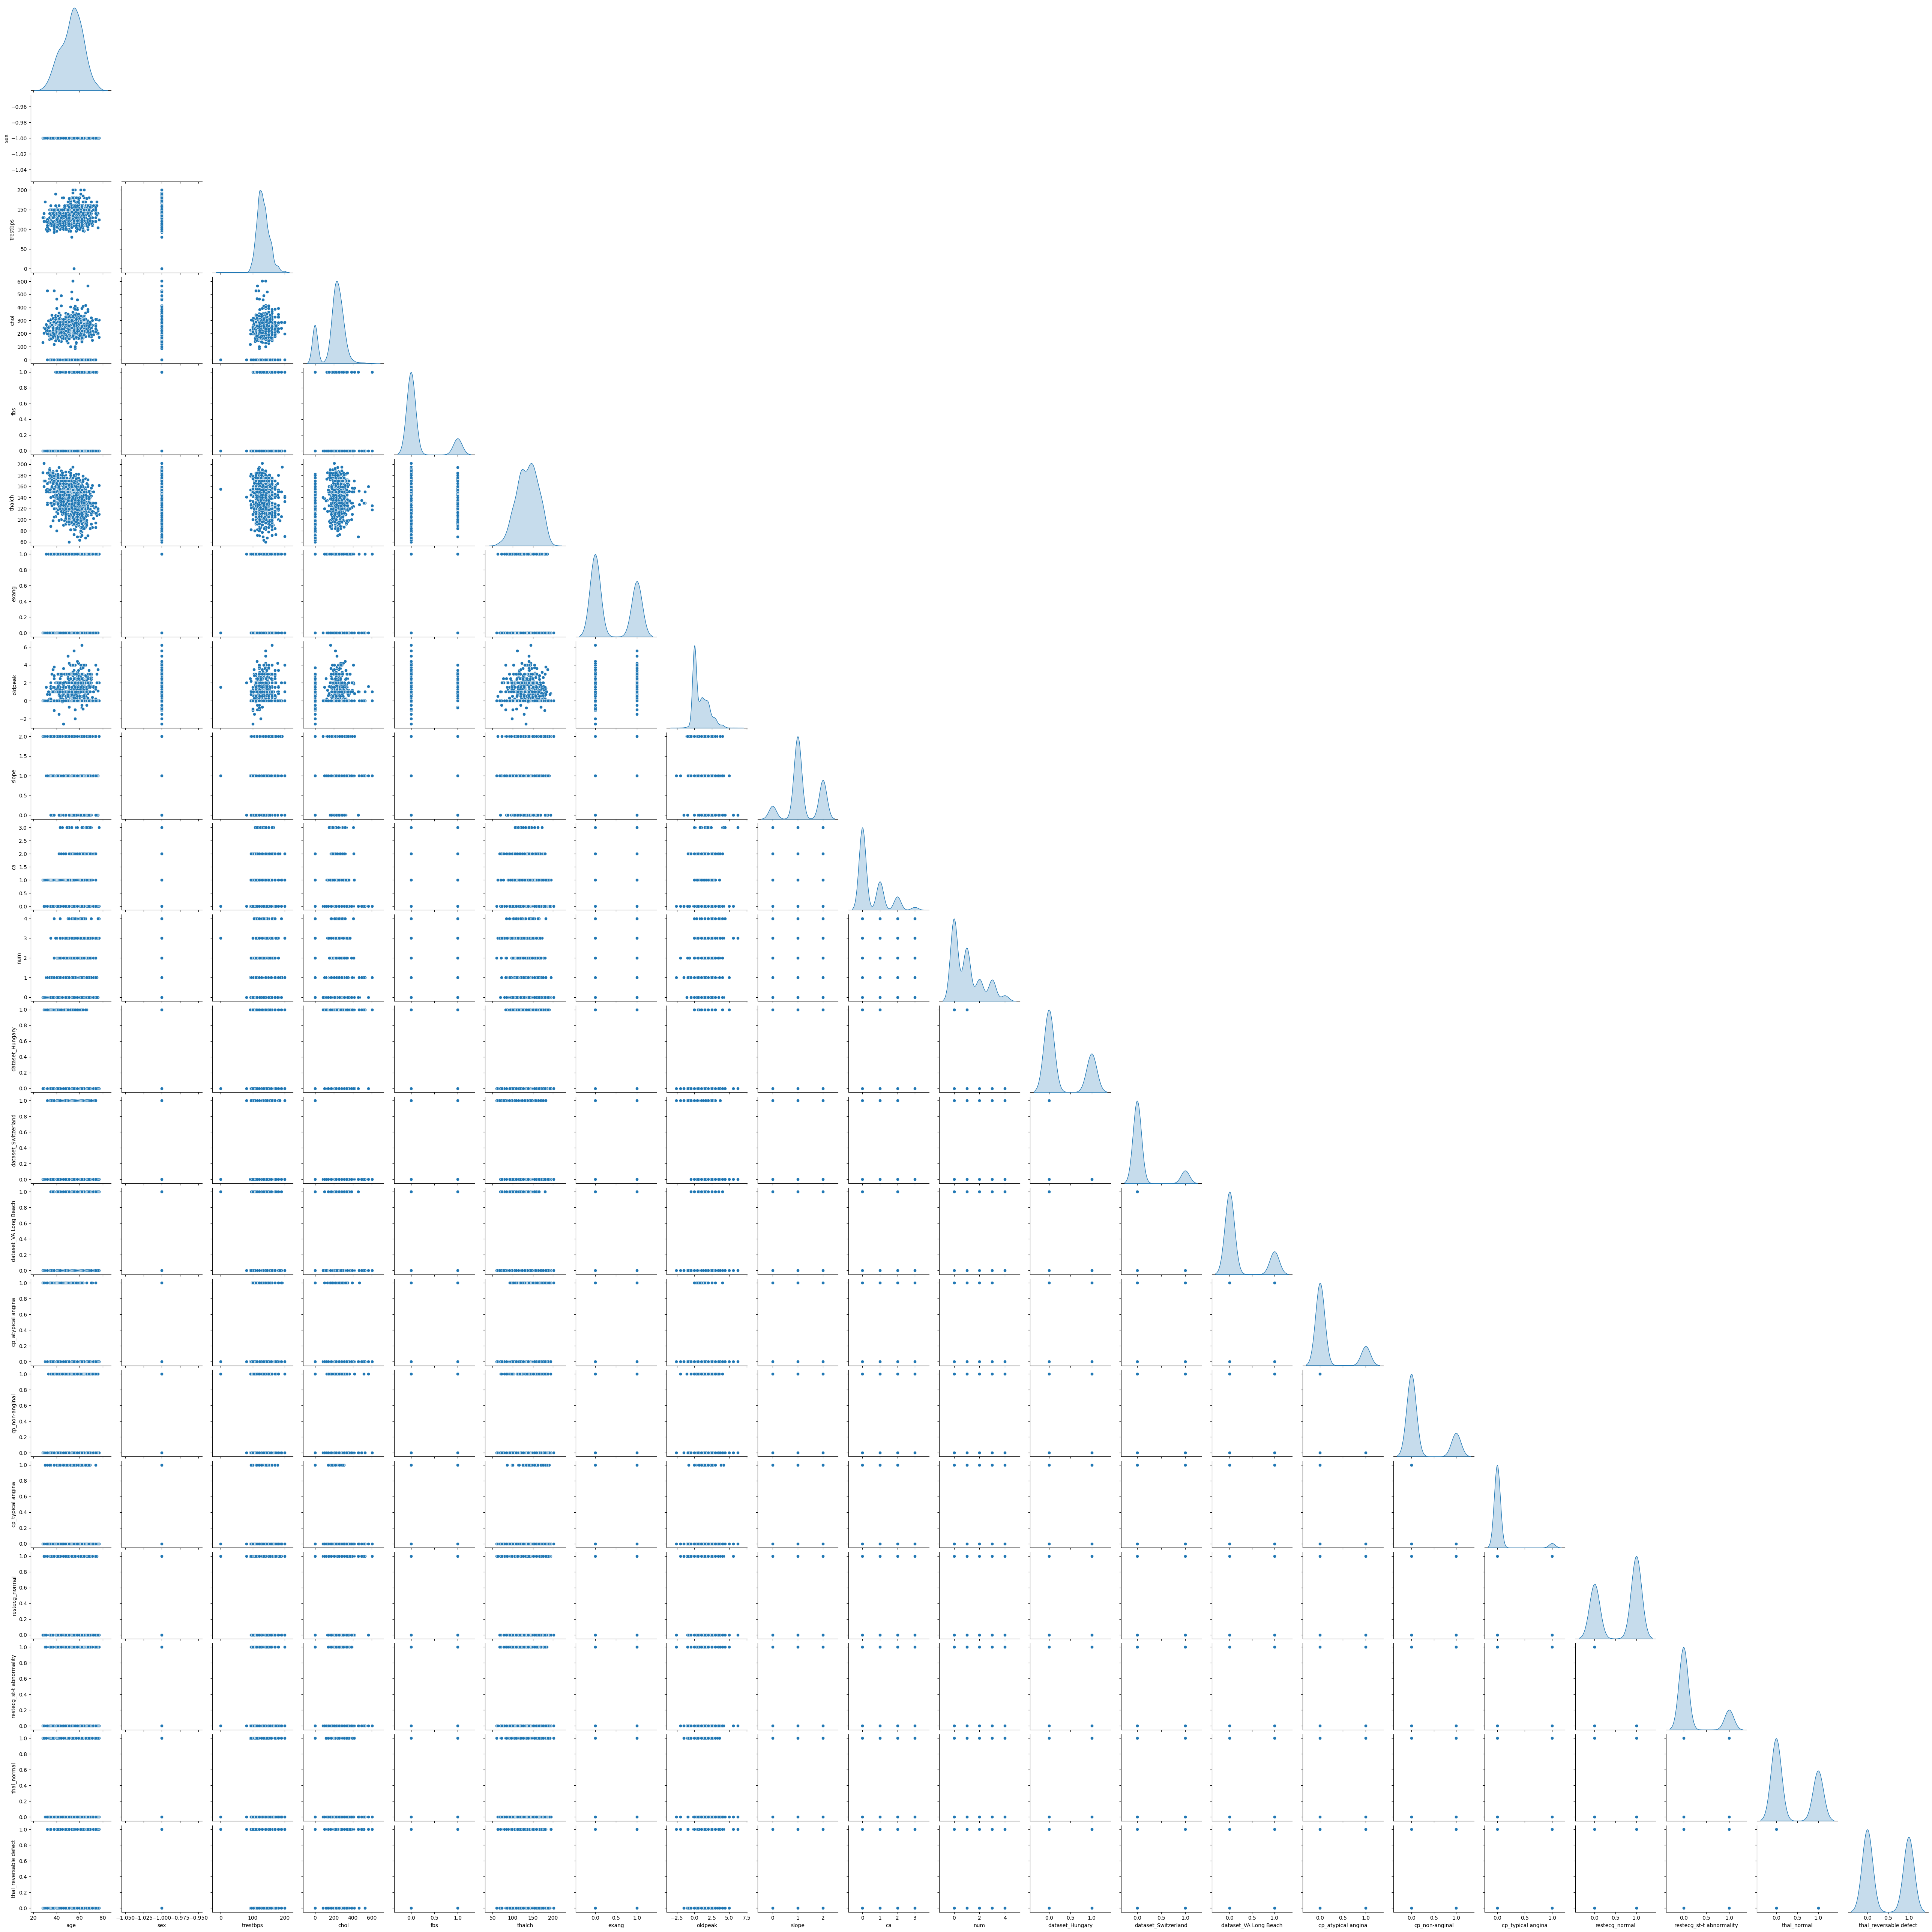

In [11]:
# Pairplot for numerical features
sns.pairplot(data, diag_kind='kde', corner=True)
plt.show()


## Identify Outliers

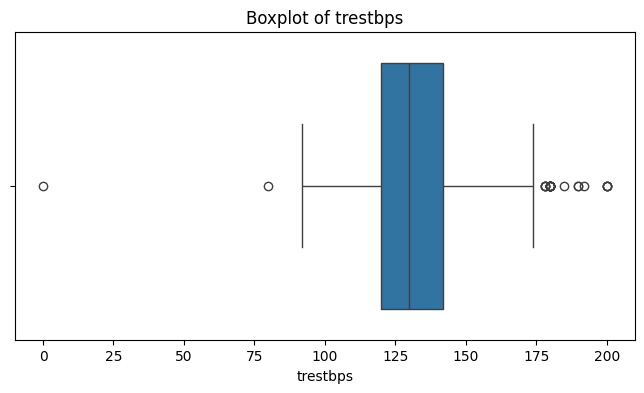

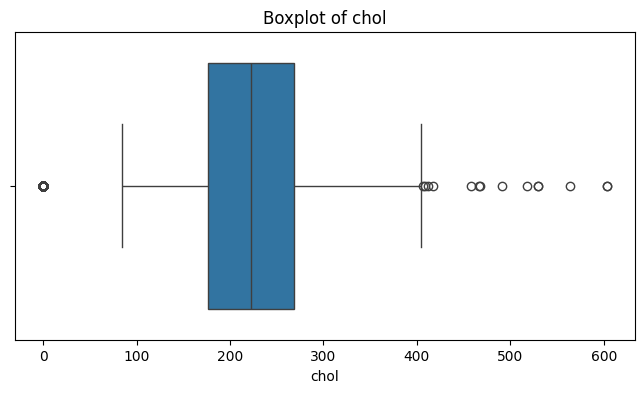

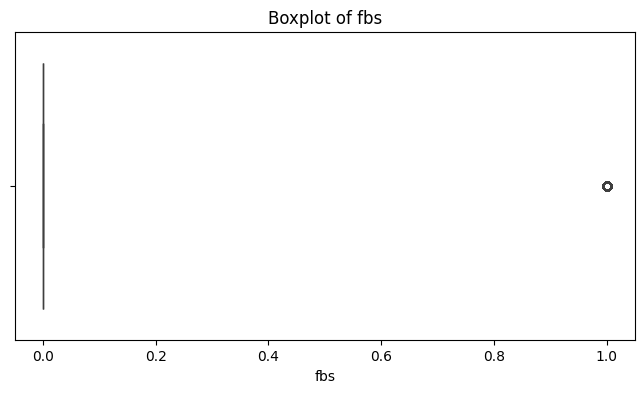

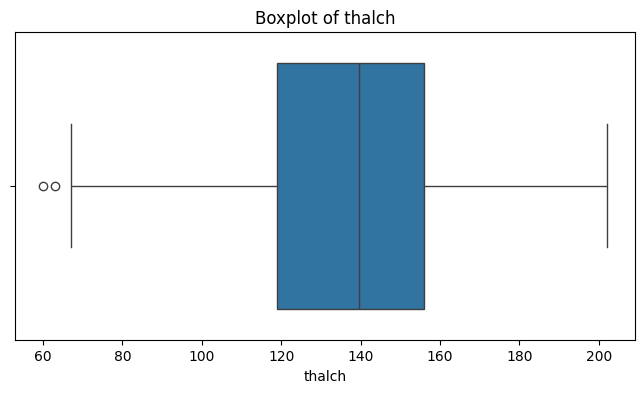

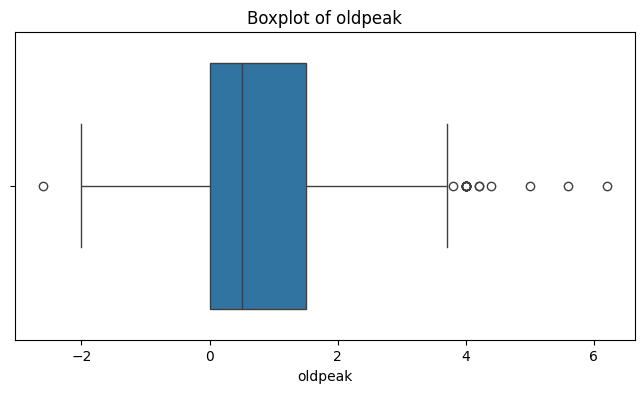

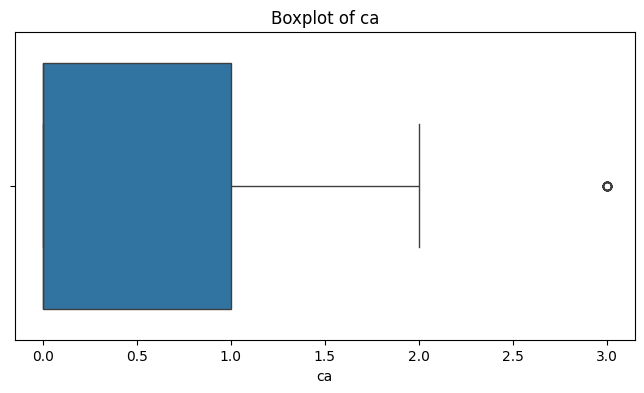

In [12]:
# Boxplots for numerical features
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


## Feature Selection

In [13]:
# Example: Drop a column with low variance or high missing values
data = data.drop(columns=['unnecessary_column'], errors='ignore')


## Handle Missing Values

In [14]:
# Impute missing values with mean
data.fillna(data.mean(), inplace=True)


## Save Cleaned Data

In [15]:
# Save the cleaned data
data.to_csv("cleaned_heart_disease.csv", index=False)
